### Generalized Linear Models 
#### LinarRegression with OLS (Ordinary Least Squares)
Fits a linear model with coefficients w1,...,wp to minimize residual sum of squares between observed responses in the dataset, and the responses predicted by the linear approximation.

In [1]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [2]:
clf.fit([[0,0],[1,1],[2,2]],[0,1,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3]:
clf.coef_

array([ 0.5,  0.5])

The coefficients rely on the independence of the model terms. Otherwis the situation of multicolinearity can arise. 

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [6]:
# load the datasets
diabetes = datasets.load_diabetes()

# use only one feature
diabetes_X = diabetes.data[:,np.newaxis, 2]

In [7]:
diabetes.data.shape # apparently 442 records, 10 features

(442, 10)

In [8]:
# split data into training and testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [9]:
# split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [10]:
# create a linear regression object
regr = linear_model.LinearRegression()

In [11]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# coefficients
print('Coefficients: \n', regr.coef_)
# the mean square error
print('Residual sum of squares: %.2f' % np.mean((regr.predict(diabetes_X_test)-diabetes_y_test) **2))

Coefficients: 
 [ 938.23786125]
Residual sum of squares: 2548.07


In [13]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Variance score: 0.47


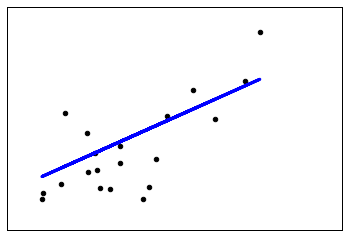

In [14]:
# plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

In [15]:
clf = linear_model.Ridge(alpha=.5)
clf.fit([[0,0],[0,0],[1,1]], [0,0.1,1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
clf.coef_

array([ 0.34545455,  0.34545455])

In [17]:
clf.intercept_

0.13636363636363641

In [18]:
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

In [19]:
y = np.ones(10)

In [20]:
# compute paths
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

In [21]:
clf = linear_model.Ridge(fit_intercept=False)

In [22]:
coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

/home/daniela/anaconda/lib/python3.4/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


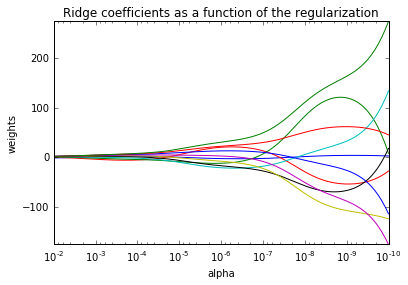

In [23]:
# display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing.

In [24]:
clf = linear_model.Lasso(alpha = 0.1)
clf.fit([[0,0],[1,1]],[0,1]) # so in our case, the target [0,1] should be a linear combination of the environment (input)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
clf.predict([1,1])

/home/daniela/anaconda/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.8])

In [26]:
clf.predict([0,0])

/home/daniela/anaconda/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.2])

As the Lasso regression yields sparse models, it can thus be used to perform feature selection, as detailed in L1-based feature selection.

### ElasticNet
ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of L1 and L2 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

In [40]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [41]:
X /= X.std(axis=0) # standardize data (easier to set the l1_ratio parameter)

In [42]:
eps = 5e-3 # the smaller it is, the longer is on the path

In [43]:
print("Computing regularization path using the lasso....")
alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, eps, fit_intercept=False)

Computing regularization path using the lasso....


In [44]:
print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = linear_model.lasso_path(
    X, y, eps, positive=True, fit_intercept=False)

Computing regularization path using the positive lasso...


In [45]:
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = linear_model.enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positve elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = linear_model.enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)


Computing regularization path using the elastic net...
Computing regularization path using the positve elastic net...


In [46]:
coefs_lasso.T.shape

(100, 10)

/home/daniela/anaconda/lib/python3.4/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


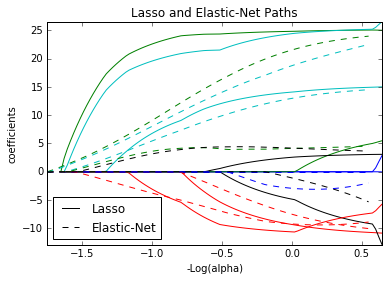

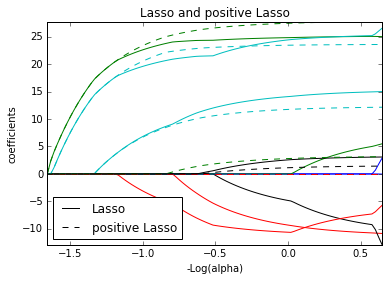

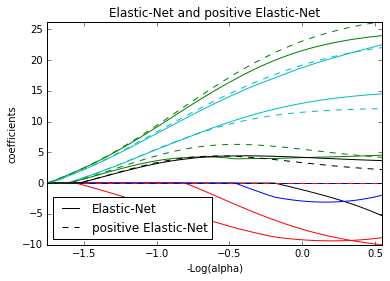

In [47]:
# Display results

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-np.log10(alphas_positive_lasso), coefs_positive_lasso.T,
              linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_enet), coefs_enet.T)
l2 = plt.plot(-np.log10(alphas_positive_enet), coefs_positive_enet.T,
              linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

In [48]:
np.random.seed(42)

LassoLars is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate_descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients.

Computes Lasso Path along the regularization parameter using the LARS algorithm on the diabetes dataset. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

In [50]:
X = diabetes.data
y = diabetes.target

print("Computing regularization path using LARS")
alphas, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)

Computing regularization path using LARS
.

In [51]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

In [52]:
xx

array([ 0.        ,  0.01737549,  0.19181185,  0.25691011,  0.36147213,
        0.41641502,  0.44423809,  0.55334329,  0.61148402,  0.63455367,
        0.80993384,  0.82745858,  1.        ])

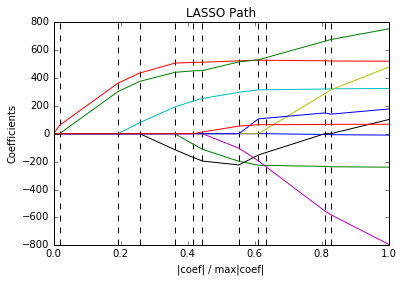

In [61]:
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

### Bayesian Regression
Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.
The advantages of Bayesian Regression are:

        It adapts to the data at hand.
        It can be used to include regularization parameters in the estimation procedure.

The disadvantages of Bayesian regression include:

        Inference of the model can be time consuming.



In [62]:
X = [[0.,0.],[1.,1.], [2.,2.],[3.,3.]]
Y = [0.,1.,2.,3.]
clf = linear_model.BayesianRidge()

In [63]:
clf.fit(X,Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [65]:
clf.predict([[1,0.]]) # after being fitted, the model can be used to predict new values

array([ 0.50000013])

In [66]:
# the weights w of the model can be accessed
clf.coef_

array([ 0.49999993,  0.49999993])

Due to the Bayesian framework, the weights found are slightly different to the ones found by Ordinary Least Squares. However, Bayesian Ridge Regression is more robust to ill-posed problem.

## Logistic regression
Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [67]:
from sklearn.svm import l1_min_c

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [68]:
X = X[y != 2]
y = y[y !=2 ]

In [74]:
X.shape

(100, 4)

In [75]:
X -= np.mean(X,0)

In [78]:
cs = l1_min_c(X, y, loss='log') * np.logspace(0, 3)

In [82]:
from datetime import datetime
print("Computing regularisation path ...")
start = datetime.now()

Computing regularisation path ...


In [83]:
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took", datetime.now() - start)

This took 0:00:00.488860


In [87]:
coefs_ = np.array(coefs_)

In [89]:
coefs_.shape

(50, 4)

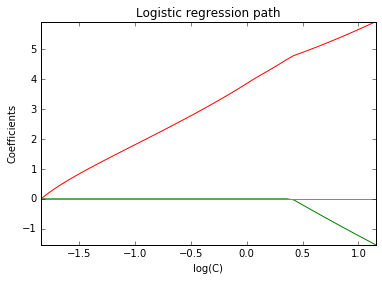

In [92]:
plt.plot(np.log10(cs), coefs_)
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic regression path')
plt.axis('tight')
plt.show()

### Stochastic Gradient Descent - SGD
Stochastic gradient descent is a simple yet very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large. The partial_fit method allows only/out-of-core learning.

Scikit-learn provides 2 robust regression estimators: RANSAC and Theil Sen

    RANSAC is faster, and scales much better with the number of samples
    RANSAC will deal better with large outliers in the y direction (most common situation)

Theil Sen will cope better with medium-size outliers in the X direction, but this property will disappear in large dimensional settings.
When in doubt, use RANSAC.
RANSAC is a non-deterministic algorithm producing only a reasonable result with a certain probability, which is dependent on the number of iterations (see max_trials parameter). It is typically used for linear and non-linear regression problems and is especially popular in the fields of photogrammetric computer vision.

In [135]:
n_samples = 1000
n_outliers = 50

X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)

In [136]:
Y

[30.722962536266728,
 -12.203908050673759,
 -6.9863839001520125,
 -3.6086408747474614,
 -17.187504585914027,
 7.4249161733942088,
 6.035324906258424,
 -2.8099966893785022,
 -8.3441645367350521,
 -17.950538708143359,
 -10.892583286979201,
 4.4371128377122675,
 -5.1216142171162655,
 -7.2686879403972284,
 2.0144833152480519,
 8.5818665293202763,
 -0.42883129943720633,
 0.14512895863171726,
 10.718621335497765,
 -1.2444670604516732,
 -6.0928854644457768,
 3.7312550277397509,
 -5.5663018269255442,
 -6.6782572413276124,
 9.7373362013955589,
 -5.9195267082562015,
 -29.551760475634701,
 0.45517943888766288,
 -6.9551645158029327,
 -5.8913685646994205,
 1.5293632653350944,
 -4.6606090835106535,
 -0.85061169905244993,
 -23.223149331957352,
 -12.430568084672624,
 11.039587386592935,
 -3.1855080451164022,
 -19.73504621990223,
 -13.725318344356577,
 -12.925861794031904,
 -1.976523174503332,
 -7.3260928054801324,
 -9.5918230243647784,
 -2.9606269556859721,
 1.7775409943352711,
 -5.5902864473889053,
 

In [137]:
X.shape

(1000, 1)

In [138]:
# add outlier data
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers,1))

In [139]:
Y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [140]:
# Fit line using all data

model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
# Robustly fit linear model with RANSAC algorithm

model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [142]:
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [143]:
# predict data of estimated models

line_X = np.arange(-5,5)

In [144]:
line_y = model.predict(line_X[:,np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

In [145]:
# Compare estimated coefficients
print("Estimated coefficients (true, normal, RANSAC):")
print(coef, model.coef_, model_ransac.estimator_.coef_)

Estimated coefficients (true, normal, RANSAC):
82.1903908407869 [ 53.76713405] [ 81.99693267]


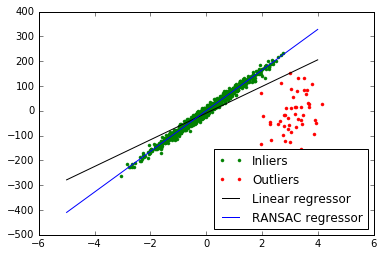

In [146]:
plt.plot(X[inlier_mask], y[inlier_mask], '.g', label='Inliers')
plt.plot(X[outlier_mask], y[outlieer_mask], '.r', label='Outliers')
plt.plot(line_X, line_y, '-k', label='Linear regressor')
plt.plot(line_X, line_y_ransac, '-b', label='RANSAC regressor')
plt.legend(loc='lower right')
plt.show()

### Theil-Sen estimator: generalized-median-based estimator

The TheilSenRegressor estimator uses a generalization of the median in multiple dimensions. It is thus robust to multivariate outliers. Note however that the robustness of the estimator decreases quickly with the dimensionality of the problem. It looses its robustness properties and becomes no better than an ordinary least squares in high dimension.

TheilSenRegressor is comparable to the Ordinary Least Squares (OLS) in terms of asymptotic efficiency and as an unbiased estimator. In contrast to OLS, Theil-Sen is a non-parametric method which means it makes no assumption about the underlying distribution of the data. Since Theil-Sen is a median-based estimator, it is more robust against corrupted data aka outliers.

#### The implementation of TheilSenRegressor in scikit-learn follows a generalization to a multivariate linear regression model [4] using the spatial median which is a generalization of the median to multiple dimensions [5].

The estimation of the model is done by calculating the slopes and intercepts of a subpopulation of all possible combinations of p subsample points. If an intercept is fitted, p must be greater than or equal to n_features + 1. The final slope and intercept is then defined as the spatial median of these slopes and intercepts. Due to the computational complexity of Theil-Sen it is recommended to use it only for small problems in terms of number of samples and features. For larger problems the max_subpopulation parameter restricts the magnitude of all possible combinations of p subsample points to a randomly chosen subset and therefore also limits the runtime. 

In [147]:
from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor

In [148]:
estimators = [('OLS', LinearRegression()), ('Theil-Sen', TheilSenRegressor(random_state=42)), ('RANSAC', RANSACRegressor(random_state=42))]

In [150]:
np.random.seed(0)
n_samples = 200
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
w = 3.
c = 2.
noise = 0.1 * np.random.randn(n_samples)
y = w * x + c + noise

In [156]:
# 10% outliers
y[-20:] += -20* x[-20:]
X = x[:, np.newaxis]

In [162]:
X.shape

(200, 1)

In [163]:
x.shape

(200,)

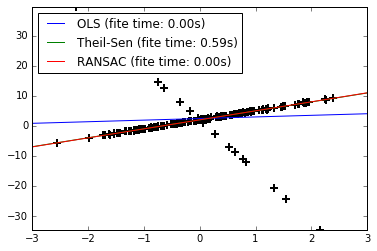

In [172]:
import time
plt.plot(x, y, 'k+', mew=2, ms=8)
line_x = np.array([-3, 3])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred, label='%s (fite time: %.2fs)' % (name, elapsed_time))
    
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()

### Polynomial regression: extending linear models with basis functions

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. 